In [45]:
import json
import matplotlib.pyplot as plt

In [52]:
# Load data
with open('output/scaling_results.json', 'r') as f:
    data = json.load(f)

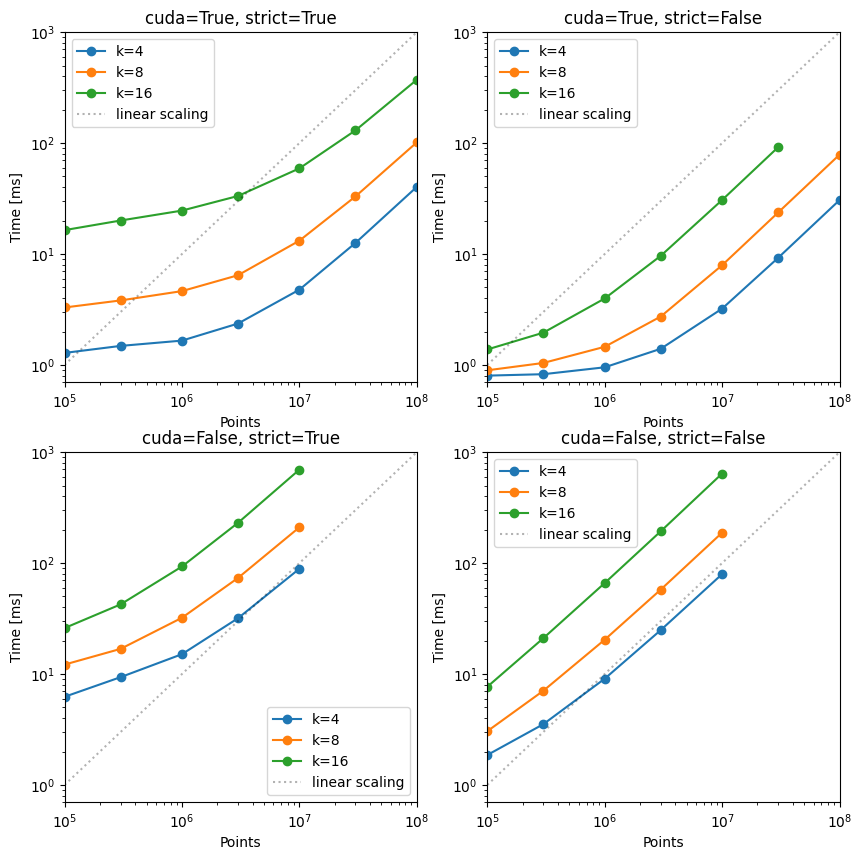

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, cuda in enumerate([True, False]):
    for j, strict in enumerate([True, False]):
        # Filter for cuda=True and strict=True
        filtered_results = []
        for result in data['results']:
            params = result['parameters']
            if params["cuda"] == cuda and params["graph"]["strict"] == strict:
                filtered_results.append(result)

        # Group by k value
        k_groups = {}
        for result in filtered_results:
            k = result['parameters']['k']
            n = result['parameters']['n']
            mean_time = result['timing']['mean']
            
            if k not in k_groups:
                k_groups[k] = {'n': [], 'times': []}
            
            k_groups[k]['n'].append(n)
            k_groups[k]['times'].append(mean_time * 1000)

        # Plot
        for k in sorted(k_groups.keys()):
            axes[i,j].plot(k_groups[k]['n'], k_groups[k]['times'], 'o-', label=f'k={k}')

        axes[i,j].plot([10**5, 10**8], [10**0, 10**3], ls=':', c='k', alpha=0.3, label='linear scaling')

        axes[i,j].set(xscale='log', yscale='log', ylabel='Time [ms]', xlabel='Points', title=f'cuda={cuda}, strict={strict}', ylim=(0.7,1000), xlim=(1e5, 1e8))
        axes[i,j].legend()

plt.show()

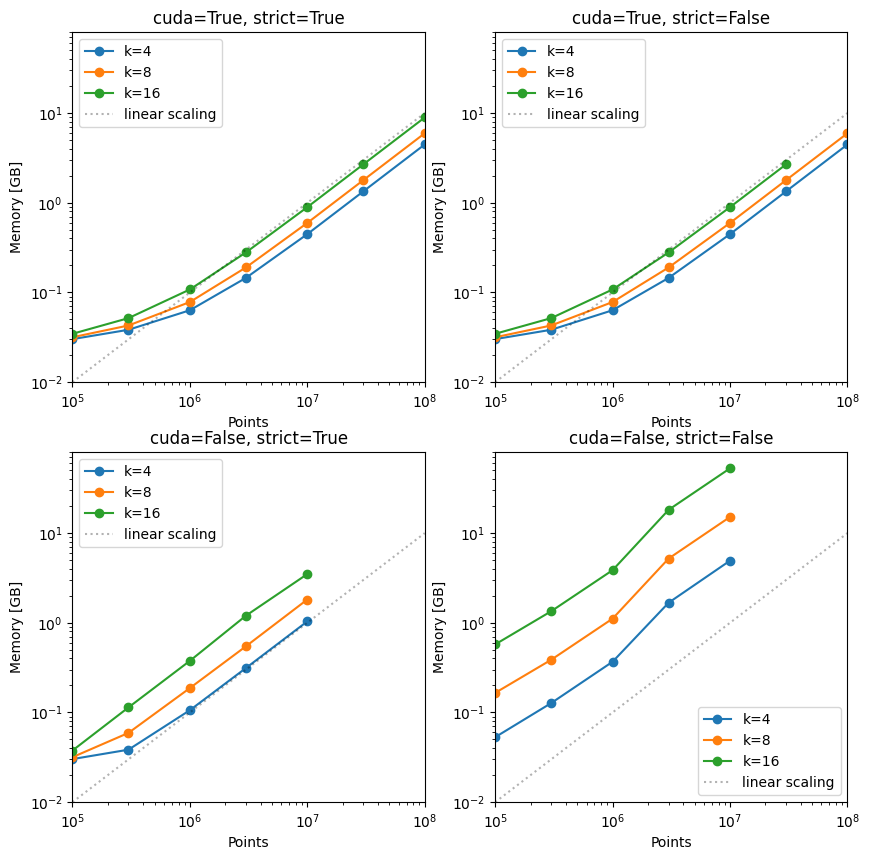

In [54]:
# Memory scaling
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, cuda in enumerate([True, False]):
    for j, strict in enumerate([True, False]):
        # Filter for cuda=True and strict=True
        filtered_results = []
        for result in data['results']:
            params = result['parameters']
            if params["cuda"] == cuda and params["graph"]["strict"] == strict:
                filtered_results.append(result)

        # Group by k value
        k_groups = {}
        for result in filtered_results:
            k = result['parameters']['k']
            n = result['parameters']['n']
            memory = result['compiled_memory_mb'] / 1024
            
            if k not in k_groups:
                k_groups[k] = {'n': [], 'memory': []}

            k_groups[k]['n'].append(n)
            k_groups[k]['memory'].append(memory)

        # Plot
        for k in sorted(k_groups.keys()):
            axes[i,j].plot(k_groups[k]['n'], k_groups[k]['memory'], 'o-', label=f'k={k}')

        axes[i,j].plot([10**5, 10**8], [10**-2, 10**1], ls=':', c='k', alpha=0.3, label='linear scaling')

        axes[i,j].set(xscale='log', yscale='log', ylabel='Memory [GB]', xlabel='Points', title=f'cuda={cuda}, strict={strict}', ylim=(0.01, 80), xlim=(1e5, 1e8))
        axes[i,j].legend()